# Livrable 1: Réexpression d'une trajectoire GPS

L'objectif de cette séance est de:
    
    - modéliser une trajectoire 
    - Transformer une trajectoire en chaine de caractères
    - Définir les métriques de travail


In [16]:
import numpy as np
import matplotlib.pyplot as plt

#### Modélisation d'une trajectoire 

Une trajectoire pour nous dans cette première étape est un numpy array de dimension $ n \times m $ où $n$ est le nombre des points composant la trajectoire, et $m$ leur dimension. Du coup une trajectoire est de la forme suivante: 

\begin{equation}
T= \begin{bmatrix} 
t_{0} & x_{0} & y_{0} \\
t_{1} & x_{1} & y_{1}\\
.. & .. & .. \\
t_{n} & x_{n} & y_{n}\\ 
\end{bmatrix}
\end{equation}

où: $ (t_{i}, x_{i}, y_{i}) $ est le vecteur représentant le point $i$; $t_{i}$ étant la dimension temporelle, et $(x_{i}, y_{i})$ la dimension spatiale.


Par exemple: 

\begin{equation}
T_{0}= \begin{bmatrix} 
0 & 1.5 & 1.5 \\
6 & 1.8 & 2.5\\
12 & 13 & 2.8 \\
18 & 5.5 & 4.8\\ 
\end{bmatrix}
\end{equation}

Est la trajectoire suivante:

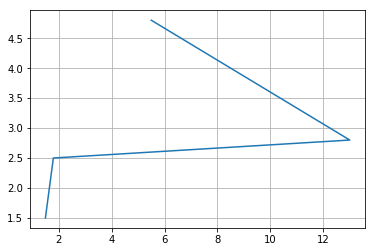

In [17]:
T0=np.array([[0,1.5,1.5],[6,1.8,2.5],[12,13,2.8],[18,5.5,4.8]])
X=np.array([1.5,1.8,13,5.5])
Y=np.array([1.5,2.5,2.8,4.8])
plt.plot(X,Y)
plt.grid()
plt.show()

Par la suite on prendra une trajectoire triviale sinusoïdale, et on se focalisera sur les propriétés spatiales.

Soit la trajectoire suivante: 

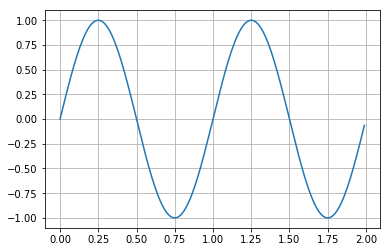

In [18]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

plt.plot(t,s)
plt.grid()
plt.show()

### Méthode Edit Distance appliquée au cas d'une trajectoire

Soit deux trajectoire $T_{1}, T_{2}$.

La méthode Edit Distance dans le cas d'une trajectoire s'inspire de Edit Distance dans le cas d'une chaine de caractères:

Étant donné deux chaînes de caractères str1 et str2. L'idée est de trouver le nombre minimum d'éditions (opérations) nécessaires pour convertir 'str1' en 'str2'. cela implique les trois opérations suivantes:

1- Insérer 

2- Enlever

3- Remplacer

Toutes les opérations ci-dessus ont un coût égal.

Dans le cas d'une trajectoire, on se donne un milieu de travaille grillé (grid) , et on représente les deux trajectoires en question, puis on convertit en chaîne de caractères.

<img src="editdis.png">

Le nombre d'opérations minimale sera alors:


In [19]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

print("le nombre des opérations minimales sans simplification:", edit_distance("EAABBBCCCDD", "EAABBBFGGHHH"))
      
print("le nombre des opérations minimales avec simplification:", edit_distance("EABCD", "EABFGH"))

le nombre des opérations minimales sans simplification: 6
le nombre des opérations minimales avec simplification: 3


### Expression d'une trajectoire en fonction d'un ensemble de motifs: 

L'objectif maintenant c'est de modéliser une trajectoire avec des motifs simple. C'est à la fois un problème de matching et d'optimisation. 

Etant données notre trajectoire sinusoidale déssinés sur un grid.


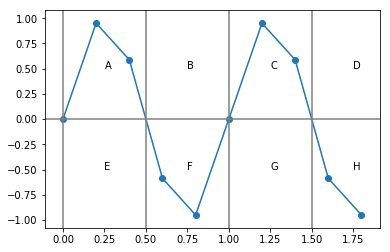

In [27]:
X = np.arange(0.0, 2.0, 0.2)
Y = np.sin(2 * np.pi * X)
plt.plot(X,Y)
plt.scatter(X,Y)

plt.text(0.25,0.5,"A")
plt.text(0.75,0.5,"B")
plt.text(1.25,0.5,"C")
plt.text(1.75,0.5,"D")

plt.text(0.25,-0.5,"E")
plt.text(0.75,-0.5,"F")
plt.text(1.25,-0.5,"G")
plt.text(1.75,-0.5,"H")

plt.axhline(y=0., color='grey')
plt.axvline(x=0.,color='grey')
plt.axvline(x=0.5,color='grey')
plt.axvline(x=1.,color='grey')
plt.axvline(x=1.5,color='grey')

plt.show()

La conversion de notre trajectoire sinusoidale en chaine de caractères nous donne alors: $'EAAFFGCCHH'$

### Définition des motifs pour simplifier une trajectoire

Dans cette partie On va définir des motifs et on va les transformer en chaine de caractères aussi pour après faire la transformation de notre trajectoire sinusoidale.

Dans un premier temps nos motifs seront des barres horizontales et verticales, qu'on affinera plus tard. Une barre horizontale peut etre 

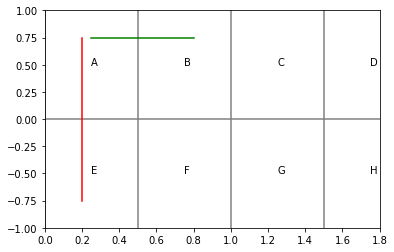

In [28]:
axes = plt.gca()
axes.set_xlim(0., 1.8)
axes.set_ylim(-1., 1.)

plt.text(0.25,0.5,"A")
plt.text(0.75,0.5,"B")
plt.text(1.25,0.5,"C")
plt.text(1.75,0.5,"D")

plt.text(0.25,-0.5,"E")
plt.text(0.75,-0.5,"F")
plt.text(1.25,-0.5,"G")
plt.text(1.75,-0.5,"H")

plt.axhline(y=0., color='grey')
plt.axvline(x=0.,color='grey')
plt.axvline(x=0.5,color='grey')
plt.axvline(x=1.,color='grey')
plt.axvline(x=1.5,color='grey')

plt.plot([0.2,0.2],[-0.75,0.75],'r')
plt.plot([0.25,0.8],[0.75,0.75],'g')


Avant de faire la réexpression , on définit les métriques avec lesquelles on va traveiller.

### Distance Euclidienne: 

C'est la mesure la plus simple possible entre deux objets de série temporelle. Elle compare les valeurs des objets au même instant $t_{i}$. 

+ Avantages:

    + Facile à implémenter, et approche intuitive.

    + Approche rapide 

+ Inconvénients: 
    + Approche naive: la dilatation du temps n'est pas pris en compte. 
    + Le bruit est déterminsite
    + Tout décalage entre objets a un effet cumulatif
    
<img src="euc.png">
    
Ci-dessous, on définit la distance euclidienne et d'autres fonctions géométriques relatives à cette métrique: distance d'un point à un segment, distance d'une point à une trajectoire, et l'intersection d'un cercle de rayon très petit avec un segment (supposé existant ici). 

In [29]:
import math

def eucl_dist(x,y):
    """
    Usage
    -----
    L2-norm between point x and y
    Parameters
    """
    dist = np.linalg.norm(x-y)
    return dist

def point_to_seg(p,s1,s2):
    """
    Usage
    -----
    Point to segment distance between point p and segment delimited by s1 and s2
    Parameters

    dpl: float
         Point to segment distance between p and s
    """
    px = p[0]
    py = p[1]
    p1x = s1[0]
    p1y = s1[1]
    p2x = s2[0]
    p2y = s2[1]
    if p1x==p2x and p1y==p2y:
        dpl=eucl_dist(p,s1)
    else:
        segl= eucl_dist(s1,s2)
        u1 = (((px - p1x) * (p2x - p1x)) + ((py - p1y) * (p2y - p1y)))
        u = u1 / (segl * segl)

        if (u < 0.00001) or (u > 1):
            #// closest point does not fall within the line segment, take the shorter distance
            #// to an endpoint
            ix = eucl_dist(p,s1)
            iy = eucl_dist(p, s2)
            if ix > iy:
                dpl = iy
            else:
                dpl = ix
        else:
            # Intersecting point is on the line, use the formula
            ix = p1x + u * (p2x - p1x)
            iy = p1y + u * (p2y - p1y)
            dpl = eucl_dist(p, np.array([ix, iy]))

    return dpl

def point_to_trajectory (p, t):
    """
    Usage
    -----
    Point-to-trajectory distance between point p and the trajectory t.
    The Point to trajectory distance is the minimum of point-to-segment distance between p and all segment s of t
    Parameters
    ----------
    param p: 1x2 numpy_array
    param t : len(t)x2 numpy_array
    Returns
    -------
    dpt : float,
          Point-to-trajectory distance between p and trajectory t
    """
    dpt=min(map(lambda s1,s2 : point_to_seg(p,s1,s2), t[:-1],t[1:] ))
    return dpt


def circle_line_intersection(px,py,s1x,s1y,s2x,s2y,eps):
    """
    Usage
    -----
    Find the intersections between the circle of radius eps and center (px, py) and the line delimited by points
    (s1x, s1y) and (s2x, s2y).
    It is supposed here that the intersection between them exists. If no, raise error
    -------
    intersect : 2x2 numpy_array
                Coordinate of the two intersections.
                If the two intersections are the same, that's means that the line is a tangent of the circle.
    """
    if s2x==s1x :
        rac=math.sqrt((eps*eps) - ((s1x-px)*(s1x-px)))
        y1 = py+rac
        y2 = py-rac
        intersect = np.array([[s1x,y1],[s1x,y2]])
    else:
        m= (s2y-s1y)/(s2x-s1x)
        c= s2y-m*s2x
        A=m*m+1
        B=2*(m*c-m*py-px)
        C=py*py-eps*eps+px*px-2*c*py+c*c
        delta=B*B-4*A*C
        if delta <= 0 :
            x = -B/(2*A)
            y = m*x+c
            intersect = np.array([[x,y],[x,y]])
        elif delta > 0 :
            sdelta = math.sqrt(delta)
            x1= (-B+sdelta)/(2*A)
            y1=m*x1+c
            x2= (-B-sdelta)/(2*A)
            y2=m*x2+c
            intersect = np.array([[x1,y1],[x2,y2]])
        else :
            raise ValueError("The intersection between circle and line is supposed to exist")
    return intersect

### Dynamic Time Wraping; Métrique et mesures de similarités:

C'est une approche différente de l'approche euclidienne, qui utilise la programmation dynamique. 

+ Avantages: 
    + Au contraire de l'approche euclidienne, Les différences temporelles sont prises en compte.
    + Plus performante que la métrique euclidienne.
+ Inconvénients: 
    + Le mappage entre tous les objets dans les deux trajectoires signifie que chaque écart est pris en compte et ajouté à la pénalité. 
    + C'est une ditance non métrique: ne satisfait pas l'inégalité triangulaire.
    
<img src="dtw.png">

On définit ci-dessous l'algorithme pour calculer le DTW entre deux trajectoires. 

In [30]:
from basic_euclidean import eucl_dist
from basic_geographical import great_circle_distance

#############
# euclidean #
#############

def e_dtw(t0,t1):
    """
    Usage
    -----
    The Dynamic-Time Warping distance between trajectory t0 and t1.
    Parameters
    ----------
    param t0 : len(t0)x2 numpy_array
    param t1 : len(t1)x2 numpy_array
    Returns
    -------
    dtw : float
          The Dynamic-Time Warping distance between trajectory t0 and t1
    """

    n0 = len(t0)
    n1 = len(t1)
    C=np.zeros((n0+1,n1+1))
    C[1:,0]=float('inf')
    C[0,1:]=float('inf')
    for i in np.arange(n0)+1:
        for j in np.arange(n1)+1:
            C[i,j]=eucl_dist(t0[i-1],t1[j-1]) + min(C[i,j-1],C[i-1,j-1],C[i-1,j])
    dtw = C[n0,n1]
    return dtw

################
# geographical #
################

def g_dtw(t0,t1):
    """
    Usage
    -----
    The Dynamic-Time Warping distance between trajectory t0 and t1.
    Parameters
    ----------
    param t0 : len(t0)x2 numpy_array
    param t1 : len(t1)x2 numpy_array
    Returns
    -------
    dtw : float
          The Dynamic-Time Warping distance between trajectory t0 and t1
    """
    n0 = len(t0)
    n1 = len(t1)
    C=np.zeros((n0+1,n1+1))
    C[1:,0]=float('inf')
    C[0,1:]=float('inf')
    for i in np.arange(n0)+1:
        for j in np.arange(n1)+1:
            C[i,j]=great_circle_distance(t0[i-1][0],t0[i-1][1],t1[j-1][0],t1[j-1][1]) + min(C[i,j-1],C[i-1,j-1],C[i-1,j])
    dtw = C[n0,n1]
    return dtw

ModuleNotFoundError: No module named 'basic_euclidean'

### Longest Common SubSequence: 

Ici, on inverse le problème: Quelles parties des trajectoires sont similaires ? 

+ Avantages: 
    + ignore les parties qui ne matchent pas.
    + Bon avec le bruit et les valeurs aberrantes.
    + Permet la distorsion temporelle.
+ Incovénients: 
    + Cette distance n'est pas métrique
    
<img src="lcss.png">

Ci-dessous l'algorithme permettant de calculer la distance LCSS

In [31]:
from basic_euclidean import eucl_dist
from basic_geographical import great_circle_distance

#############
# euclidean #
#############

def e_lcss(t0, t1,eps):
    """
    Usage
    -----
    The Longuest-Common-Subsequence distance between trajectory t0 and t1.
    Parameters
    ----------
    param t0 : len(t0)x2 numpy_array
    param t1 : len(t1)x2 numpy_array
    eps : float
    Returns
    -------
    lcss : float
           The Longuest-Common-Subsequence distance between trajectory t0 and t1
    """
    n0 = len(t0)
    n1 = len(t1)
    # An (m+1) times (n+1) matrix
    C = [[0] * (n1+1) for _ in range(n0+1)]
    for i in range(1, n0+1):
        for j in range(1, n1+1):
            if eucl_dist(t0[i-1],t1[j-1])<eps:
                C[i][j] = C[i-1][j-1] + 1
            else:
                C[i][j] = max(C[i][j-1], C[i-1][j])
    lcss = 1-float(C[n0][n1])/min([n0,n1])
    return lcss

################
# geographical #
################

def g_lcss(t0, t1,eps):
    """
    Usage
    -----
    The Longuest-Common-Subsequence distance between trajectory t0 and t1.
    Parameters
    ----------
    param t0 : len(t0)x2 numpy_array
    param t1 : len(t1)x2 numpy_array
    eps : float
    Returns
    -------
    lcss : float
           The Longuest-Common-Subsequence distance between trajectory t0 and t1
    """
    n0 = len(t0)
    n1 = len(t1)
    # An (m+1) times (n+1) matrix
    C = [[0] * (n1+1) for _ in range(n0+1)]
    for i in range(1, n0+1):
        for j in range(1, n1+1):
            if great_circle_distance(t0[i-1,0],t0[i-1,1],t1[j-1,0],t1[j-1,1])<eps:
                C[i][j] = C[i-1][j-1] + 1
            else:
                C[i][j] = max(C[i][j-1], C[i-1][j])
    lcss = 1-float(C[n0][n1])/min([n0,n1])
    return lcss

ModuleNotFoundError: No module named 'basic_euclidean'

### Comparaison des méthodes: 

Dans cette partie, on crée deux trajectoires et on compart entre les 4 distances ci-dessus.

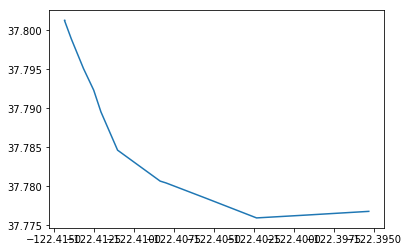

In [32]:
traj_A = np.array([[-122.39534, 37.77678],[-122.3992 , 37.77631],[-122.40235, 37.77594],[-122.40553, 37.77848],
                   [-122.40801, 37.78043],[-122.40837, 37.78066],[-122.41103, 37.78463],[-122.41207, 37.78954],
                   [-122.41252, 37.79232],[-122.41316, 37.7951 ],[-122.41392, 37.7989 ],[-122.41435, 37.80129],
                   [-122.41434, 37.80129]])
traj_B = np.array([[-122.39472, 37.77672],[-122.3946 , 37.77679],[-122.39314, 37.77846],[-122.39566, 37.78113],
                   [-122.39978, 37.78438],[-122.40301, 37.78708],[-122.4048 , 37.78666],[-122.40584, 37.78564],
                   [-122.40826, 37.78385],[-122.41061, 37.78321],[-122.41252, 37.78299]])
traj_C = np.array([[-122.39542, 37.77665],[-122.3988 , 37.77417],[-122.41042, 37.76944],[-122.41459, 37.77016],
                   [-122.41462, 37.77013]])
traj_list = [traj_A, traj_B, traj_C]

LA1=[traj_A[i][0] for i in range(len(traj_A))]
LA2=[traj_A[i][1] for i in range(len(traj_A))]

LB1=[traj_B[i][0] for i in range(len(traj_B))]
LB2=[traj_B[i][1] for i in range(len(traj_B))]


plt.plot(LA1,LA2)
#Traj_A

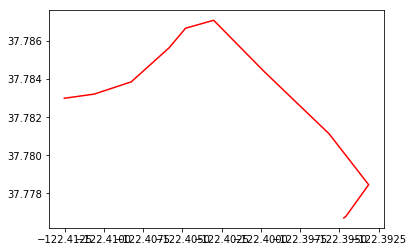

In [33]:
plt.plot(LB1,LB2,'r')
#Traj_B

In [34]:
a=e_lcss(traj_A, traj_B,0.001)
b=e_dtw(traj_A, traj_B)
c=e_edr(traj_A, traj_B,0.001)

L=[a,b,c]

plt.scatter([0.,1., 2.],L)
plt.plot(L)

plt.text(0.1,0.9,'LCSS')
plt.text(1.,0.3,'DTW')
plt.text(1.75,0.9,'EDR')

NameError: name 'e_lcss' is not defined

D'après ce petit jeu de données qu'on a créee, la distance et la mesure de similarités la plus efficace est Dynamix Time Warping. 

### Etapes à venir: 

+ Créer un jeu de données non aléatoires et tester les algorithmes.

+ Réexprimer une trajectoire de notre jeu de données avec des motifs simple Via une programmation dynamique (avec Edit Dist), couplé avec un algorithme d’Optimisation (Glouton) 

+ Tester sur des données GPS réels (cela dit que nous devons faire la correspondance entre notre modélisation simplifiée d’une trajectoire et une modélisation réelle) 

    + Tester avec des données qu'on connait à priori
    
    + revoir Edit Distance
    
    + Recalage/ notion de repère locale et décider la direction au fur et à mesure.
    
    + Voir l'usage dans d'autres contextes (financier par exemple)
    